# Privacy Dialogue

This jupyter notebook documents the analysis of a chatbot experiment conducted on the 1st of July 2020. In the experiment we compare five conditions: (1) a control condition, (2) a privacy condition in which users have the choice to delete their data from the interaction with priming / a reason "to protect you privacy", (3) a privacy condition in which users have the choice to delete their data from the interaction without priming, (4) a privacy condition in which users are offered to learn more about what happens to their data with priming / a reason given "to learn more about your data" and (5) a privacy condition in which users are offered to learn more about what happens to their data without priming. 

In condition (2) privacy control *with priming* the chatbot asks users at the end of an interaction "Do you want me to delete your data from this interaction now to protect your privacy?".  In the privacy condition (3) *without priming* the chatbot asks users at the end of an interaction "Do you want me to delete your data from this interaction now?". The responses of the chatbot are the same in condition (2) and (3).

In condition (4) privacy data transparency *with priming* the chatbot asks users at the end of an interaction "Do you want to know how your data is processed to be more informed about your data?".  In the privacy data transparency condition (5) *without priming* the chatbot asks users at the end of an interaction "Do you want to know how your data is processed?". The responses of the chatbot are the same in condition (4) and (5).

In the control condition the chatbot asks users at the end of the interaction "Is there anything else I can help you with?". Except of this the interactions are the same. Users are told that they are interacting with a banking chatbot and their task is to check the balance of a credit card ending with 5678 for the past three months. 

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [ ]:
df = pd.read_csv('Bank_Privacy_Dialogue_results_180620.csv')

In [ ]:
df_new1 = pd.read_csv('Bank_Privacy_Dialogue_Priming_results_230620.csv')
df_new2 = pd.read_csv('Bank_Privacy_Dialogue_Priming_results_010720.csv')



In [4]:
df = df.append(df_new1, ignore_index = True)
df = df.append(df_new2, ignore_index = True)


In [5]:
len(df)

312

In [ ]:
def find_multi_participant(l_workerid: list, l_assignmentid: list):
    d = {}
    multi_participation_assignmentid = []
    
    for i in list(range(len(l_workerid))):
        # if key doesn't exist
        if l_workerid[i] not in d.keys():
            d[l_workerid[i]] = 1
        else:
            d[l_workerid[i]] += 1
            multi_participation_assignmentid.append(l_assignmentid[i])
            
    return multi_participation_assignmentid

In [7]:
multi_participation = find_multi_participant(list(df['workerid']), list(df['assignmentid']))
multi_participation

['3W92K5RLWVK57UEWC4PAXBCUXRS5V1',
 '3X4JMASXCNCR39UPAHSYF4MWDR10B5',
 '3R08VXYT7DYX9NSKQ793HX94V6P7WS',
 '3A4TN5196LLLOESRMPVEWGRVHT4HCW',
 '3E1QT0TDFQCJ86DYBVXUU6WRRFY8IA',
 '3M81GAB8A1MFR2ZORFMDUADEQVYQBS',
 '36PW28KO40ZLBP4RCARH5I4UPAQAE6',
 '34QN5IT0T0U81BWI758OO2WV5LG086',
 '34S9DKFK74SQ1DF7LF8GYRGA6TTNYH',
 '3FFJ6VRIL2R1QH8VGRKF1RQ98HL0IE',
 '3OS4RQUCRAII0D9FDZBJIB90JUUFBU',
 '3PM8NZGV8ZJM452PWBEVJ7469ZRQX8',
 '32UTUBMZ7HZ7WAV5DEGN0XCM7NDVBR',
 '3P59JYT76MNYV5RKPQNXYMLXGXST2H']

In [8]:
multi_participation = find_multi_participant(list(df['workerid']), list(df['assignmentid']))

df['multi_participation'] = df['assignmentid'].apply(lambda a_id: a_id in multi_participation)

In [9]:
len(df[df['multi_participation'] == True])

14

In [ ]:
df.head()

: 

In [ ]:
df.columns

: 

## Feature Engineering

Create feature **q_total** with items: 'q_SEC1', 'q_SEC2', 'q_SEC5',
       'q_SEC6', 'q_SEC7', 'q_SEC8', 'q_PRIV1', 'q_PRIV2', 'q_PRIV3',
       'q_PRIV4', 'q_PRIV5', 'q_PRIV6', 'q_USAB1', 'q_USAB2', 'q_USAB3',
       'q_USAB4', 'q_USAB5', 'q_USAB7', 'q_TRUST_HON1', 'q_TRUST_HON2',
       'q_TRUST_HON3', 'q_TRUST_HON4', 'q_TRUST_HON5', 'q_TRUST_BENEV1',
       'q_TRUST_BENEV2', 'q_TRUST_BENEV3', 'q_TRUST_BENEV4', 'q_TRUST_BENEV5',
       'q_TRUST_BENEV6', 'q_TRUST_COMP1', 'q_TRUST_COMP2', 'q_TRUST_COMP3',
       'q_TRUST_COMP4', 'q_COMMIT2', 'q_COMMIT3', 'q_COMMIT5'
       
Create feature **q_security** with items: 'q_SEC1', 'q_SEC2', 'q_SEC5', 'q_SEC6', 'q_SEC7', 'q_SEC8'

Create feature **q_privacy** with items: 'q_PRIV1', 'q_PRIV2', 'q_PRIV3', 'q_PRIV4', 'q_PRIV5', 'q_PRIV6'

Create feature **q_usability** with items: 'q_USAB1', 'q_USAB2', 'q_USAB3', 'q_USAB4', 'q_USAB5', 'q_USAB7'

Create feature **q_trust** with items: 'q_TRUST_HON1', 'q_TRUST_HON2','q_TRUST_HON3', 'q_TRUST_HON4', 'q_TRUST_HON5', 'q_TRUST_BENEV1','q_TRUST_BENEV2', 'q_TRUST_BENEV3', 'q_TRUST_BENEV4', 'q_TRUST_BENEV5', 'q_TRUST_BENEV6', 'q_TRUST_COMP1', 'q_TRUST_COMP2', 'q_TRUST_COMP3', 'q_TRUST_COMP4'

Create feature **q_trust_honest** with items: 'q_TRUST_HON1', 'q_TRUST_HON2','q_TRUST_HON3', 'q_TRUST_HON4', 'q_TRUST_HON5'

Create feature **q_trust_benevolence** with items: 'q_TRUST_BENEV1','q_TRUST_BENEV2', 'q_TRUST_BENEV3', 'q_TRUST_BENEV4', 'q_TRUST_BENEV5', 'q_TRUST_BENEV6'

Create feature **q_trust_competence** with items: 'q_TRUST_COMP1', 'q_TRUST_COMP2', 'q_TRUST_COMP3', 'q_TRUST_COMP4'

Create feature **q_commitment** containing an average of items: 'q_COMMIT2', 'q_COMMIT3', 'q_COMMIT5'.

Create featue **number_of_errors** containing the number of errors.

In [12]:
q_total = ['q_SEC1', 'q_SEC2', 'q_SEC5', 'q_SEC6', 'q_SEC7', 'q_SEC8', 'q_PRIV1', 'q_PRIV2', 'q_PRIV3', 'q_PRIV4', 'q_PRIV5', 'q_PRIV6', 'q_USAB1', 'q_USAB2', 'q_USAB3', 'q_USAB4', 'q_USAB5', 'q_USAB7', 'q_TRUST_HON1', 'q_TRUST_HON2', 'q_TRUST_HON3', 'q_TRUST_HON4', 'q_TRUST_HON5', 'q_TRUST_BENEV1', 'q_TRUST_BENEV2', 'q_TRUST_BENEV3', 'q_TRUST_BENEV4', 'q_TRUST_BENEV5', 'q_TRUST_BENEV6', 'q_TRUST_COMP1', 'q_TRUST_COMP2', 'q_TRUST_COMP3', 'q_TRUST_COMP4', 'q_COMMIT2', 'q_COMMIT3', 'q_COMMIT5']
df['q_total'] = df[q_total].mean(axis=1)


In [13]:
q_security = ['q_SEC1', 'q_SEC2', 'q_SEC5', 'q_SEC6', 'q_SEC7', 'q_SEC8']
df['q_security'] = df[q_security].mean(axis = 1)


In [14]:
q_privacy = ['q_PRIV1', 'q_PRIV2', 'q_PRIV3', 'q_PRIV4', 'q_PRIV5', 'q_PRIV6']
df['q_privacy'] = df[q_privacy].mean(axis=1)


In [15]:
q_usability = ['q_USAB1', 'q_USAB2', 'q_USAB3', 'q_USAB4', 'q_USAB5', 'q_USAB7']
df['q_usability'] = df[q_usability].mean(axis=1)


In [16]:
q_trust = ['q_TRUST_HON1', 'q_TRUST_HON2','q_TRUST_HON3', 'q_TRUST_HON4', 'q_TRUST_HON5', 'q_TRUST_BENEV1','q_TRUST_BENEV2', 'q_TRUST_BENEV3', 'q_TRUST_BENEV4', 'q_TRUST_BENEV5', 'q_TRUST_BENEV6', 'q_TRUST_COMP1', 'q_TRUST_COMP2', 'q_TRUST_COMP3', 'q_TRUST_COMP4']
df['q_trust'] = df[q_trust].mean(axis=1)


In [17]:
q_trust_honest = ['q_TRUST_HON1', 'q_TRUST_HON2','q_TRUST_HON3', 'q_TRUST_HON4', 'q_TRUST_HON5']
df['q_trust_honest'] = df[q_trust_honest].mean(axis=1)

In [18]:
q_trust_benevolence = ['q_TRUST_BENEV1','q_TRUST_BENEV2', 'q_TRUST_BENEV3', 'q_TRUST_BENEV4', 'q_TRUST_BENEV5', 'q_TRUST_BENEV6']
df['q_trust_benevolence'] = df[q_trust_benevolence].mean(axis=1)

In [19]:
q_trust_competence = ['q_TRUST_COMP1', 'q_TRUST_COMP2', 'q_TRUST_COMP3', 'q_TRUST_COMP4']
df['q_trust_competence'] = df[q_trust_competence].mean(axis=1)

In [20]:
q_commitment = ['q_COMMIT2', 'q_COMMIT3', 'q_COMMIT5']
df['q_commitment'] = df[q_commitment].mean(axis=1)

In [21]:
df['number_of_errors'] = df['transcript'].apply(lambda string: string.count('Sorry'))

## Data cleaning

In [22]:
df = df[df['response_yn'] != 'yes|no']
len(df)

307

In [23]:
df = df[df['response_yn'] != 'yes|yes']
len(df)

297

In [24]:
df = df[df['multi_participation'] != True]
len(df)

283

In [25]:
len(df[df['condition'] == 'data_priming'])

21

# Analysis

## Do privacy messages affect privacy and security perceptions?

To address this question, we will compare the control group with condition (2) privacy control and (4) privacy data transparency.

In [26]:
df_124 = df[(df['condition'] == "control") | (df['condition'] == "privacy_priming") | (df['condition'] == "data_priming")]

In [27]:
df_124['condition'].head()

4     control
6     control
9     control
11    control
12    control
Name: condition, dtype: object

### Plotting

[Text(0, 0.5, 'Commitment for chatbot'), Text(0.5, 0, 'Conditions')]

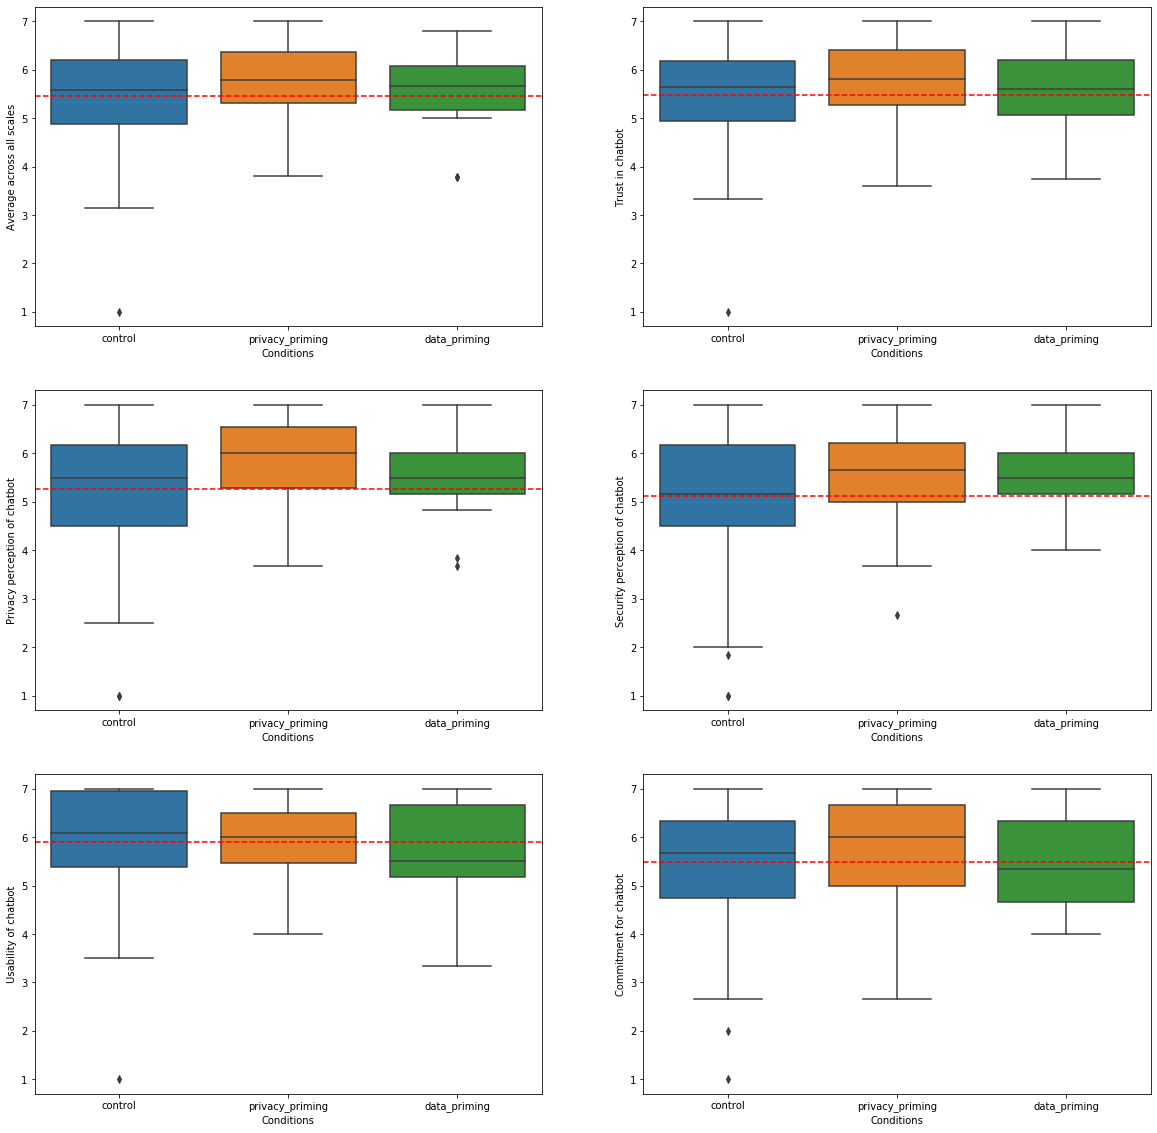

In [28]:
fig, axes = plt.subplots(3,2, figsize = (20,20))

sns.boxplot(x = 'condition', y = 'q_total', data = df, ax = axes[0,0], order=["control", "privacy_priming", "data_priming"])
axes[0,0].axhline(np.mean(df[df['condition'] == 'control']['q_total']), ls='--', color = 'red')
axes[0,0].set(xlabel = 'Conditions', ylabel = 'Average across all scales')
sns.boxplot(x = 'condition', y = 'q_trust', data = df, ax = axes[0,1], order=["control", "privacy_priming", "data_priming"])
axes[0,1].axhline(np.mean(df[df['condition'] == 'control']['q_trust']), ls='--', color = 'red')
axes[0,1].set(xlabel = 'Conditions', ylabel = 'Trust in chatbot')
sns.boxplot(x = 'condition', y = 'q_privacy', data = df, ax = axes[1,0], order=["control", "privacy_priming", "data_priming"])
axes[1,0].axhline(np.mean(df[df['condition'] == 'control']['q_privacy']), ls='--', color = 'red')
axes[1,0].set(xlabel = 'Conditions', ylabel = 'Privacy perception of chatbot')
sns.boxplot(x = 'condition', y = 'q_security', data = df, ax = axes[1,1], order=["control", "privacy_priming", "data_priming"])
axes[1,1].axhline(np.mean(df[df['condition'] == 'control']['q_security']), ls='--', color = 'red')
axes[1,1].set(xlabel = 'Conditions', ylabel = 'Security perception of chatbot')
sns.boxplot(x = 'condition', y = 'q_usability', data = df, ax = axes[2,0], order=["control", "privacy_priming", "data_priming"])
axes[2,0].axhline(np.mean(df[df['condition'] == 'control']['q_usability']), ls='--', color = 'red')
axes[2,0].set(xlabel = 'Conditions', ylabel = 'Usability of chatbot')
sns.boxplot(x = 'condition', y = 'q_commitment', data = df, ax = axes[2,1], order=["control", "privacy_priming", "data_priming"])
axes[2,1].axhline(np.mean(df[df['condition'] == 'control']['q_commitment']), ls='--', color = 'red')
axes[2,1].set(xlabel = 'Conditions', ylabel = 'Commitment for chatbot')

### T-Tests for Average across all scales

In [29]:
from statsmodels.stats.power import TTestIndPower
from scipy.stats import ttest_ind

In [30]:
ttest_ind(df[df['condition']=='privacy_priming']['q_total'], df[df['condition']=='control']['q_total'])

Ttest_indResult(statistic=1.9252706012000365, pvalue=0.0562231849246068)

In [31]:
ttest_ind(df[df['condition']=='data_priming']['q_total'], df[df['condition']=='control']['q_total'])

Ttest_indResult(statistic=0.558435852843213, pvalue=0.5777357071133943)

In [32]:
ttest_ind(df[df['condition']=='data_priming']['q_total'], df[df['condition']=='privacy_priming']['q_total'])

Ttest_indResult(statistic=-0.8528441342017983, pvalue=0.3964611608331897)

### T-Tests for Privacy Perceptions

In [33]:
ttest_ind(df[df['condition']=='privacy_priming']['q_privacy'], df[df['condition']=='control']['q_privacy'])

Ttest_indResult(statistic=2.81895941375077, pvalue=0.005516686829825681)

In [34]:
ttest_ind(df[df['condition']=='data_priming']['q_privacy'], df[df['condition']=='control']['q_privacy'])

Ttest_indResult(statistic=0.967595114243428, pvalue=0.33547007138943596)

In [35]:
ttest_ind(df[df['condition']=='data_priming']['q_total'], df[df['condition']=='privacy_priming']['q_total'])

Ttest_indResult(statistic=-0.8528441342017983, pvalue=0.3964611608331897)

#### Power Analysis for Privacy Perceptions

In [36]:
import pingouin as pg
pg.compute_effsize(df[df['condition']=='data_priming']['q_privacy'], df[df['condition']=='control']['q_privacy'], eftype='cohen')

0.23551939802799535

In [37]:
# parameters for the analysis 
effect_size = 0.23551939802799535
alpha = 0.05 # significance level
power = 0.8

power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size = effect_size, 
                                         power = power, 
                                         alpha = alpha)

print('Required sample size: {0:.2f}'.format(sample_size))

Required sample size: 283.96


/opt/anaconda3/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.5, the latest is 0.3.6.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


### T-Tests for Security Perceptions

In [39]:
ttest_ind(df[df['condition']=='privacy_priming']['q_security'], df[df['condition']=='control']['q_security'])

Ttest_indResult(statistic=2.3454493457447505, pvalue=0.020408280863130894)

In [40]:
ttest_ind(df[df['condition']=='data_priming']['q_security'], df[df['condition']=='control']['q_security'])

Ttest_indResult(statistic=1.3493309110106282, pvalue=0.1801330650085039)

In [41]:
ttest_ind(df[df['condition']=='data_priming']['q_security'], df[df['condition']=='privacy_priming']['q_security'])

Ttest_indResult(statistic=-0.313031154723372, pvalue=0.7551258198072104)

#### Power Analysis for Security Perceptions

In [42]:
pg.compute_effsize(df[df['condition']=='data_priming']['q_security'], df[df['condition']=='control']['q_security'], eftype='cohen')

0.32843655287601936

In [43]:
# parameters for the analysis 
effect_size = 0.32843655287601936
alpha = 0.05 # significance level
power = 0.8

power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size = effect_size, 
                                         power = power, 
                                         alpha = alpha)

print('Required sample size: {0:.2f}'.format(sample_size))

Required sample size: 146.49


### T-Tests for Trust

In [47]:
ttest_ind(df[df['condition']=='privacy_priming']['q_trust'], df[df['condition']=='control']['q_trust'])

Ttest_indResult(statistic=1.65164951140489, pvalue=0.1008472829206181)

In [48]:
ttest_ind(df[df['condition']=='data_priming']['q_trust'], df[df['condition']=='control']['q_trust'])

Ttest_indResult(statistic=0.5226663835740567, pvalue=0.602307533997079)

In [49]:
ttest_ind(df[df['condition']=='data_priming']['q_trust'], df[df['condition']=='privacy_priming']['q_trust'])

Ttest_indResult(statistic=-0.6538417160759298, pvalue=0.5152135734059122)

### T-Tests for Usability

In [50]:
ttest_ind(df[df['condition']=='privacy_priming']['q_usability'], df[df['condition']=='control']['q_usability'])

Ttest_indResult(statistic=-0.0859400077776535, pvalue=0.9316368927546855)

In [51]:
ttest_ind(df[df['condition']=='data_priming']['q_usability'], df[df['condition']=='control']['q_usability'])

Ttest_indResult(statistic=-0.9317014155608607, pvalue=0.3536282045866268)

In [52]:
ttest_ind(df[df['condition']=='data_priming']['q_usability'], df[df['condition']=='privacy_priming']['q_usability'])

Ttest_indResult(statistic=-1.0532908147697357, pvalue=0.2955893329699392)

### T-Tests for Commitment

In [53]:
ttest_ind(df[df['condition']=='privacy_priming']['q_commitment'], df[df['condition']=='control']['q_commitment'])

Ttest_indResult(statistic=1.2479023183117275, pvalue=0.21414998248555733)

In [54]:
ttest_ind(df[df['condition']=='data_priming']['q_commitment'], df[df['condition']=='control']['q_commitment'])

Ttest_indResult(statistic=0.09319109566646706, pvalue=0.9259293340392893)

In [55]:
ttest_ind(df[df['condition']=='data_priming']['q_commitment'], df[df['condition']=='privacy_priming']['q_commitment'])

Ttest_indResult(statistic=-0.8729290095794688, pvalue=0.38548804348733146)

## Do privacy messages affect user choices?

In [56]:
percentages = []
conditions = ["control", "privacy_priming", "data_priming"]

for c in conditions:
    percentages.append((len(df[(df['condition'] == c) & (df['response_yn'] == "yes")])/len(df[(df['condition'] == c)]), 
                       len(df[(df['condition'] == c) & (df['response_yn'] == "no")])/len(df[(df['condition'] == c)])))

df_percentages = pd.DataFrame(percentages, index = conditions, columns = ['Yes', 'No'])
df_percentages

,Yes,No
control,0.104651,0.895349
privacy_priming,0.785714,0.214286
data_priming,0.571429,0.428571


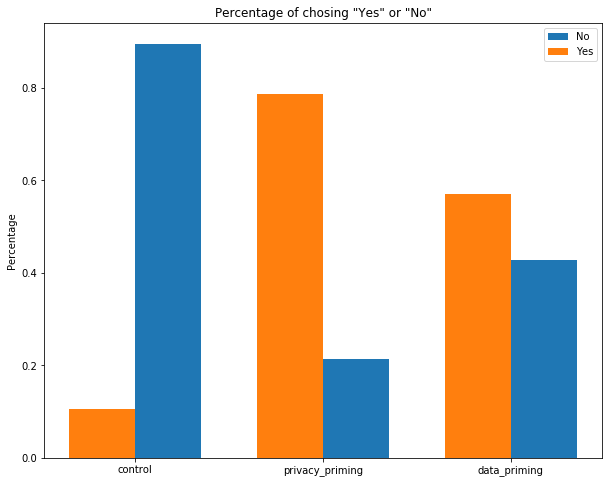

In [57]:

yes = df_percentages['Yes']
no = df_percentages['No']

x = np.arange(len(conditions))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize = (10,8))
rects1 = ax.bar(x + width/2, no, width, label='No')
rects2 = ax.bar(x - width/2, yes, width, label='Yes')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage')
ax.set_title('Percentage of chosing "Yes" or "No"')
ax.set_xticks(x)
ax.set_xticklabels(conditions)
ax.legend()


## Are privacy and security perceptions influenced by privacy priming?

In [58]:
df_delete = df[(df['condition'] == 'privacy_priming') | (df['condition'] == 'privacy_no_priming')]
df_info = df[(df['condition'] == 'data_priming') | (df['condition'] == 'data_no_priming')]

### Data deletion

Text(0.5, 1.0, 'Privacy perception for data deletion without and with privacy priming')

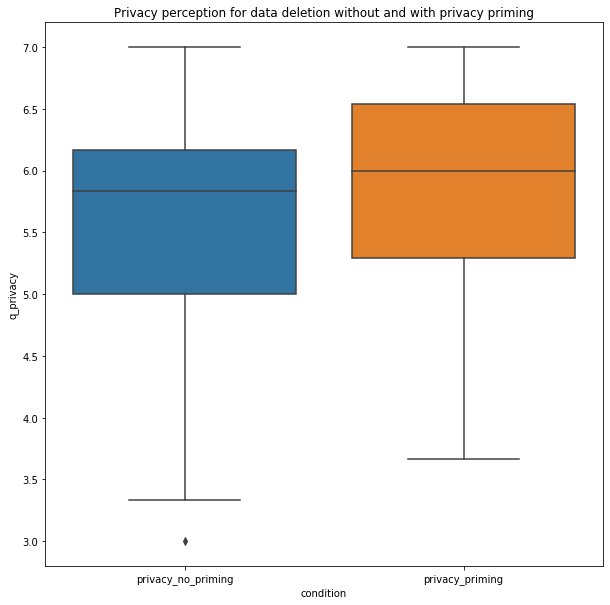

In [59]:
plt.figure(figsize = (10,10))

sns.boxplot(x = 'condition', y = 'q_privacy', data = df_delete)
plt.title('Privacy perception for data deletion without and with privacy priming')

In [61]:
ttest_ind(df_delete[df_delete['condition'] == 'privacy_no_priming']['q_privacy'], 
                df_delete[df_delete['condition'] == 'privacy_priming']['q_privacy'])

Ttest_indResult(statistic=-1.3293200853677911, pvalue=0.18637349874315268)

Text(0.5, 1.0, 'Security perception for data deletion without and with privacy priming')

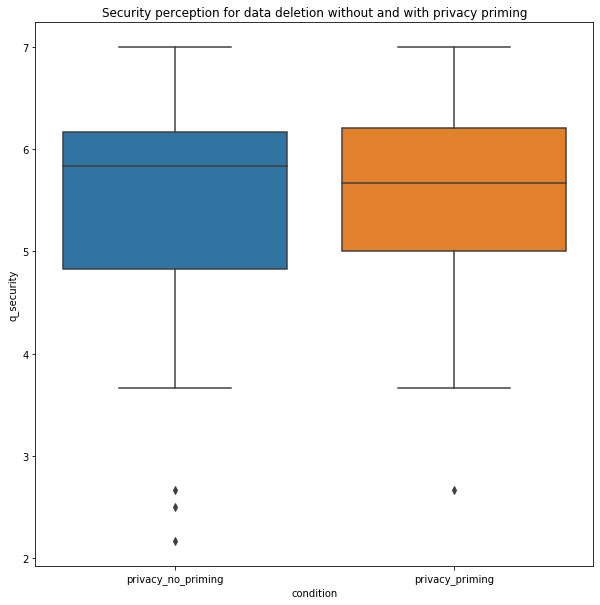

In [62]:
plt.figure(figsize = (10,10))

sns.boxplot(x = 'condition', y = 'q_security', data = df_delete)
plt.title('Security perception for data deletion without and with privacy priming')

In [63]:
ttest_ind(df_delete[df_delete['condition'] == 'privacy_no_priming']['q_security'], 
                df_delete[df_delete['condition'] == 'privacy_priming']['q_security'])

Ttest_indResult(statistic=-0.8427071894175596, pvalue=0.40114148541240846)

Text(0.5, 1.0, 'Trust for data deletion without and with privacy priming')

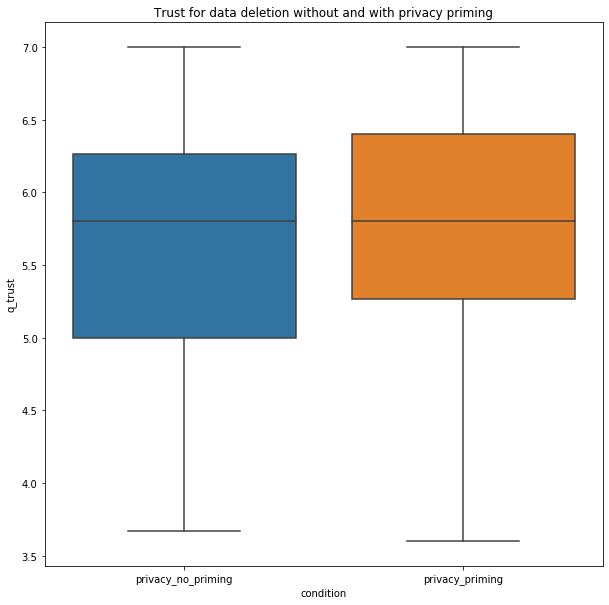

In [64]:
plt.figure(figsize = (10,10))

sns.boxplot(x = 'condition', y = 'q_trust', data = df_delete)
plt.title('Trust for data deletion without and with privacy priming')

In [65]:
ttest_ind(df_delete[df_delete['condition'] == 'privacy_no_priming']['q_trust'], 
                df_delete[df_delete['condition'] == 'privacy_priming']['q_trust'])

Ttest_indResult(statistic=-0.7726934438174597, pvalue=0.4412890287581278)

### Data information

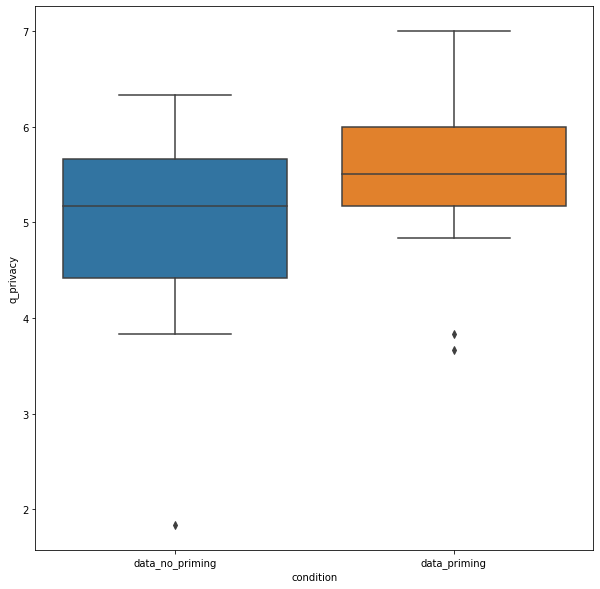

In [66]:
plt.figure(figsize = (10,10))

sns.boxplot(x = 'condition', y = 'q_privacy', data = df_info, order = ['data_no_priming', 'data_priming'])

In [67]:
ttest_ind(df_info[df_info['condition'] == 'data_no_priming']['q_privacy'], 
                df_info[df_info['condition'] == 'data_priming']['q_privacy'])

Ttest_indResult(statistic=-1.8385704997329608, pvalue=0.0732297569166389)

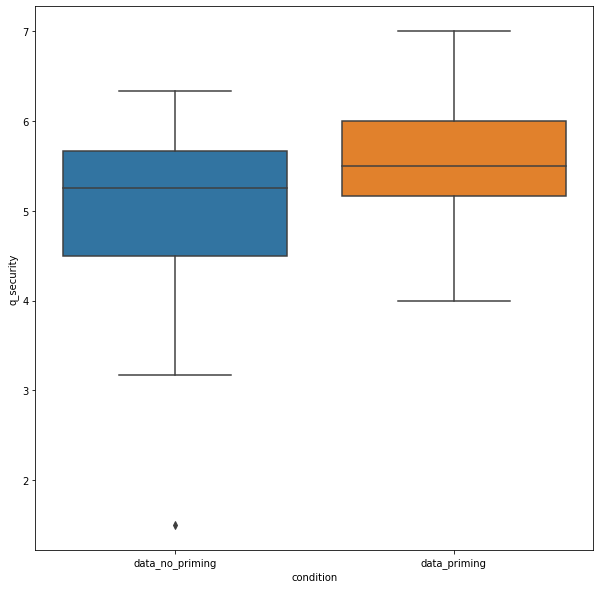

In [68]:
plt.figure(figsize = (10,10))

sns.boxplot(x = 'condition', y = 'q_security', data = df_info, order = ['data_no_priming', 'data_priming'])

In [69]:
ttest_ind(df_info[df_info['condition'] == 'data_no_priming']['q_security'], 
                df_info[df_info['condition'] == 'data_priming']['q_security'])

Ttest_indResult(statistic=-2.119907272318167, pvalue=0.040112564195754485)

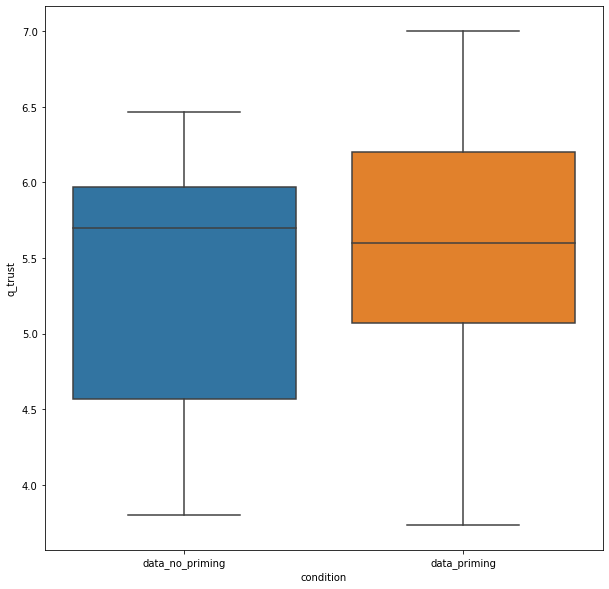

In [70]:
plt.figure(figsize = (10,10))

sns.boxplot(x = 'condition', y = 'q_trust', data = df_info, order = ['data_no_priming', 'data_priming'])

In [71]:
ttest_ind(df_info[df_info['condition'] == 'data_no_priming']['q_trust'], 
                df_info[df_info['condition'] == 'data_priming']['q_trust'])

Ttest_indResult(statistic=-1.095064024687223, pvalue=0.2798799642141078)